In [131]:
from bs4 import BeautifulSoup
import bs4
import urllib3


BeautifulSoup is a package that allows you to parse HTML from web pages.  However, you still need to actually "get" the web page itself.  To do that, use a package called "urllib".

Urllib is an "http client" able to interact with web pages on the internet.  Our main use is to send GET requests to website servers of interest and retrieve a web page. 

In [2]:
http = urllib3.PoolManager()
r = http.request('GET', 'http://httpbin.org/robots.txt')
print("Status: %d" % r.status)

Status: 200


Some common statuses: 

200 = OK

400 = Bad Request

403 = Forbidden

404 = Status not found

500 = Internal server error

In [116]:
with open("hacknehs.html",'r') as f:
    webpage = f.read()

In [134]:
for child in page.body.children:
    if type(child) == bs4.element.Tag:
        for grandchild in child.children:
            print(grandchild)



<h1>How to make a movie: </h1>


<p>1. Come up with a great premise</p>


<p>2. Write a screenplay</p>




<p>3. Set up actor auditions </p>




In [117]:
page = BeautifulSoup(webpage)

In [5]:
for p in page.body.div.find_all("p"):
    print(p.string)

1. Come up with a great premise
2. Write a screenplay


### Reuters

In [162]:
url = "https://www.reuters.com/news/world"
http = urllib3.PoolManager()
r = http.request('GET', url)
print("Status: %d" % r.status)

Status: 200


In [163]:
s = BeautifulSoup(r.data,'html.parser')

In [164]:
image_stories = []

for d in s.find_all("div"):
    if d.has_attr('class'):
        if "ImageStoryTemplate_image-story-container" in d['class']:
            image_stories.append(d)

In [165]:
num = len(image_stories)
links = [image_stories[i].h2.a['href'] for i in range(num)]

In [166]:
texts = []
for link in links:
    ns = http.request('GET', link)
    nsd = BeautifulSoup(ns.data, 'html.parser')
    text = ""
    
    for p in nsd.find('div', class_="StandardArticleBody_body").find_all('p'):
        if p.string != None:
            text += p.string
        
    texts.append(text)

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [169]:
def make_word_cloud(text):
    wordcloud = WordCloud(width=1920,height=1080).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

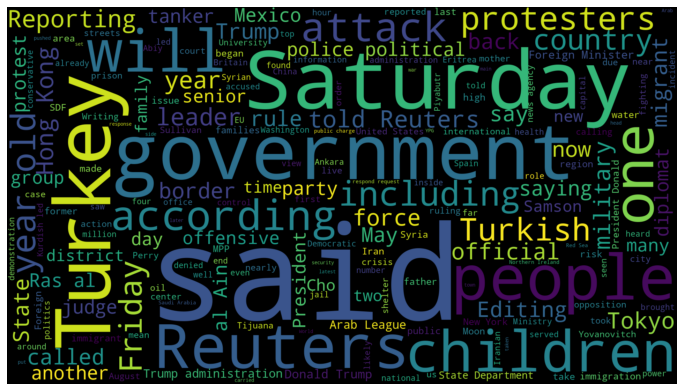

In [170]:
make_word_cloud(" ".join(texts))

In [75]:
print(image_stories[0].prettify())

<div class="ImageStoryTemplate_image-story-container">
 <p class="FeedItemMeta_meta-container has-feature-decor FeedItemMeta_density-full">
  <a class="FeedItemMeta_channel" href="https://www.reuters.com/news/archive/worldNews">
   World News
  </a>
  <span class="FeedItemMeta_date-updated">
   2 minutes ago
  </span>
  <span class="FeedItemMeta_feature-decor" style="color:#f37021" title="Top Headline">
   <svg height="15px" version="1.1" viewbox="0 0 10 15" width="10px">
    <defs>
    </defs>
    <g fill="none" id="Channel-Pages----Mobile" stroke="none" stroke-width="1">
     <g id="Technology-Channel" transform="translate(-1034.000000, -941.000000)">
      <g id="article-01-copy" transform="translate(275.000000, 905.000000)">
       <g id="Featuired-flag" transform="translate(759.000000, 36.000000)">
        <polygon fill="#F36F21" id="Rectangle-2" points="0 2 10 2 7.33333333 5.63125 10 9 0 9">
        </polygon>
        <rect height="14" id="Rectangle-12" rx="0.5" stroke="#F36F21" 

### Politico

In [171]:
url = "https://www.politico.com/"
http = urllib3.PoolManager()
r = http.request('GET', url)
print("Status: %d" % r.status)
site = BeautifulSoup(r.data)

Status: 200


In [172]:
pot = []
badwords = ["staff","video","gallery","2020-election"]

for link in site.body.find_all('a',class_="js-tealium-tracking"):
    save_link = True
    
    if link.get('data-tracking') != None:
        if "lcol=item_solo" in link['data-tracking'] and link['target'] == "_top":
            
            for word in badwords:
                if word in link['href']:
                    save_link = False
            
            if save_link:
                pot.append(link)

In [173]:
texts = []

for link in pot:
    ns = http.request('GET', link['href'])
    nsd = BeautifulSoup(ns.data)

    text = ""
    for d in nsd.body.find_all('div',class_="story-text"):
        for p in d.find_all('p'):
            text += p.getText()

    texts.append(text)

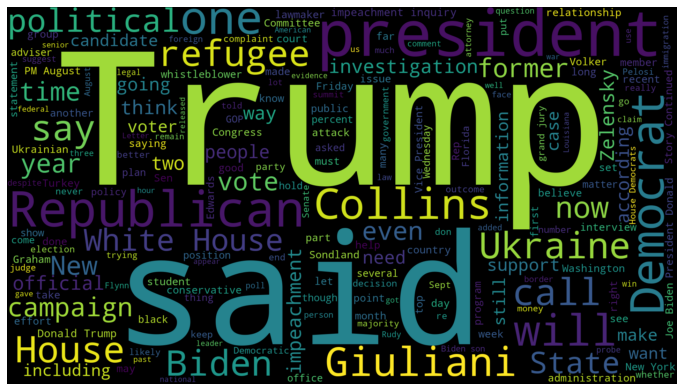

In [174]:
make_word_cloud(" ".join(texts))